#TASK #1: PROBLEM STATEMENT AND PROJECT OVERVIEW

![alt text](https://drive.google.com/uc?id=1qOZKOEs_N-SbkO2vqlsxpXfHAqjZLw1p)

#TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock
# BA = Boeing
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
stock_df = pd.read_csv("/content/stock.csv")
stock_df


Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [ ]:
# Sort the stock data by date
stock_df.sort_values(by=['Date'], inplace=True)
stock_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [ ]:
# Print out the number of stocks
number_of_stocks = len(stock_df.columns[1:])
print(f"Number of stocks:{number_of_stocks}")

Number of stocks:9


In [ ]:
# Print the name of stocks
stocks = stock_df.columns[1:]
stocks = list(stocks)
for i in stocks:
  print(i)

AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


**MINI CHALLENGE #1:**
- **What is the average return of the S&P500?**
- **Which stock or index has the minimum dispertion from the mean in dollar value?**
- **What is the maximum price for AMZN stock over the specified time period?**

In [ ]:
avg_return_sp500 = stock_df["sp500"].mean()
print(f"Average return of S&P500: {avg_return_sp500}")

Average return of S&P500: 2218.7495540592868


In [ ]:
# Only select numeric columns (automatically excludes 'Date')
numeric_df = stock_df.select_dtypes(include='number')

# Calculate standard deviation for each numeric column
std_devs = numeric_df.std()

# Find the one with minimum dispersion
min_dispersion_asset = std_devs.idxmin()
min_dispersion_value = std_devs.min()

print(f"Minimum dispersion is for: {min_dispersion_asset}")
print(f"Standard deviation (in $): {min_dispersion_value:.2f}")


#numeric_df stock_df.drop(columns= ["Date"]).... We could have used this as well

Minimum dispersion is for: T
Standard deviation (in $): 3.21


In [ ]:
max_price_amzn = stock_df["AMZN"].max()
print(f"Maximum price for AMZN stock over the specified time period: {max_price_amzn}")

Maximum price for AMZN stock over the specified time period: 3225.0


In [ ]:
stock_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [ ]:
# Check if data contains any null values
stock_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Getting dataframe info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [ ]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method
def show_plot(df, fig_title):
  df.plot(x="Date", figsize=(20,10), title=fig_title)
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.grid()
  plt.show()

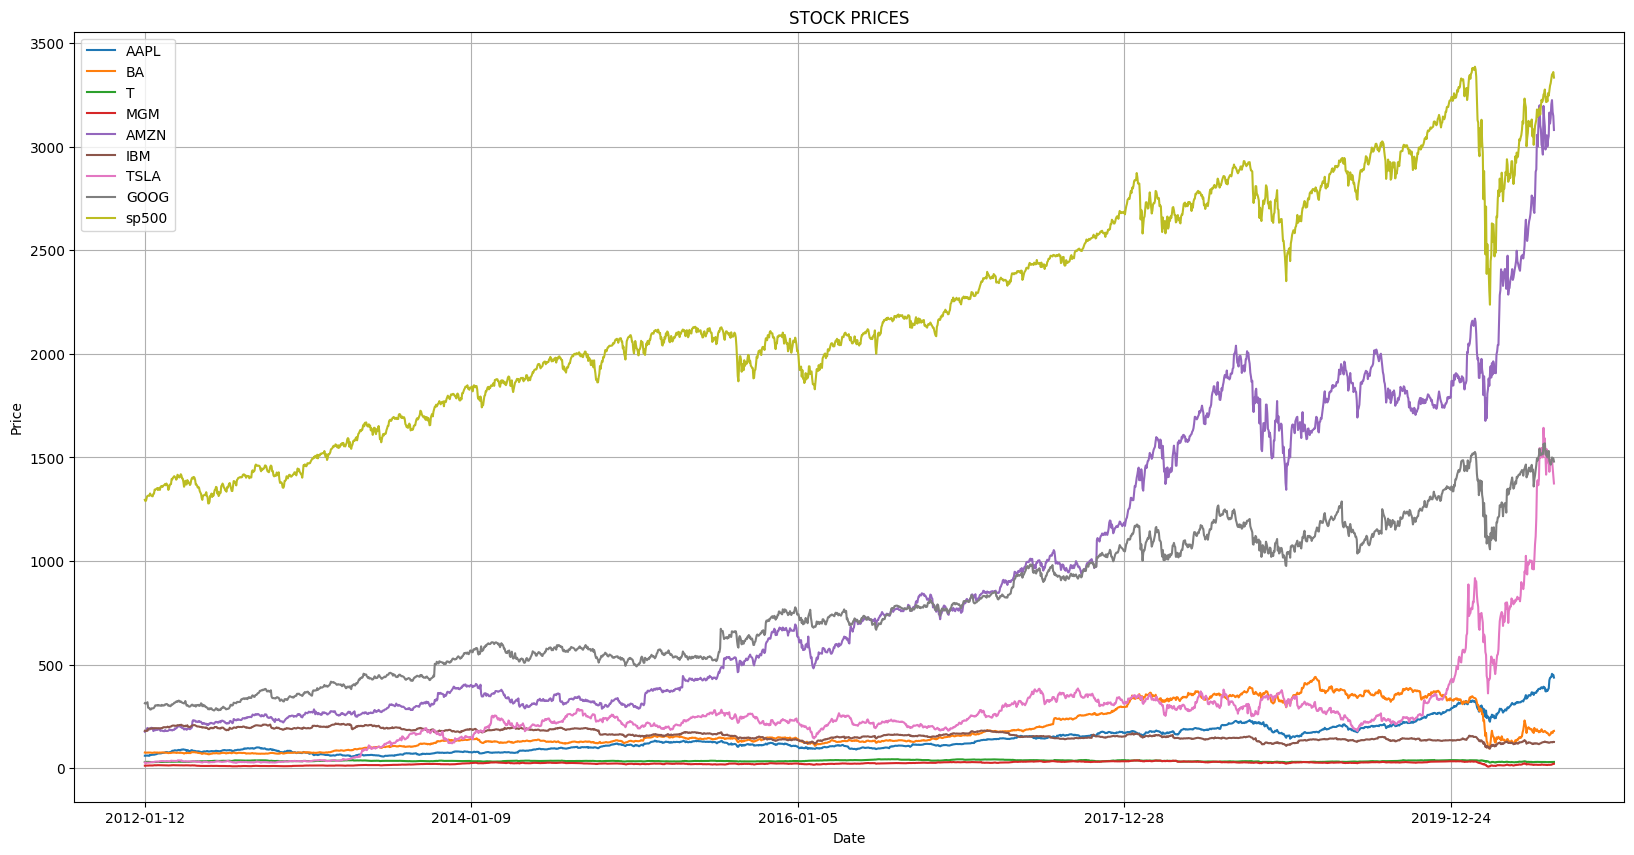

In [ ]:
# Plot the data
show_plot(stock_df, 'STOCK PRICES')

**MINI CHALLENGE #2:**
- **Print out normalized (scaled) stock prices**  


In [ ]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]   #Its like how each element of an array is being divided by the first element like in numpy...x[i] is a numpy array
  return x

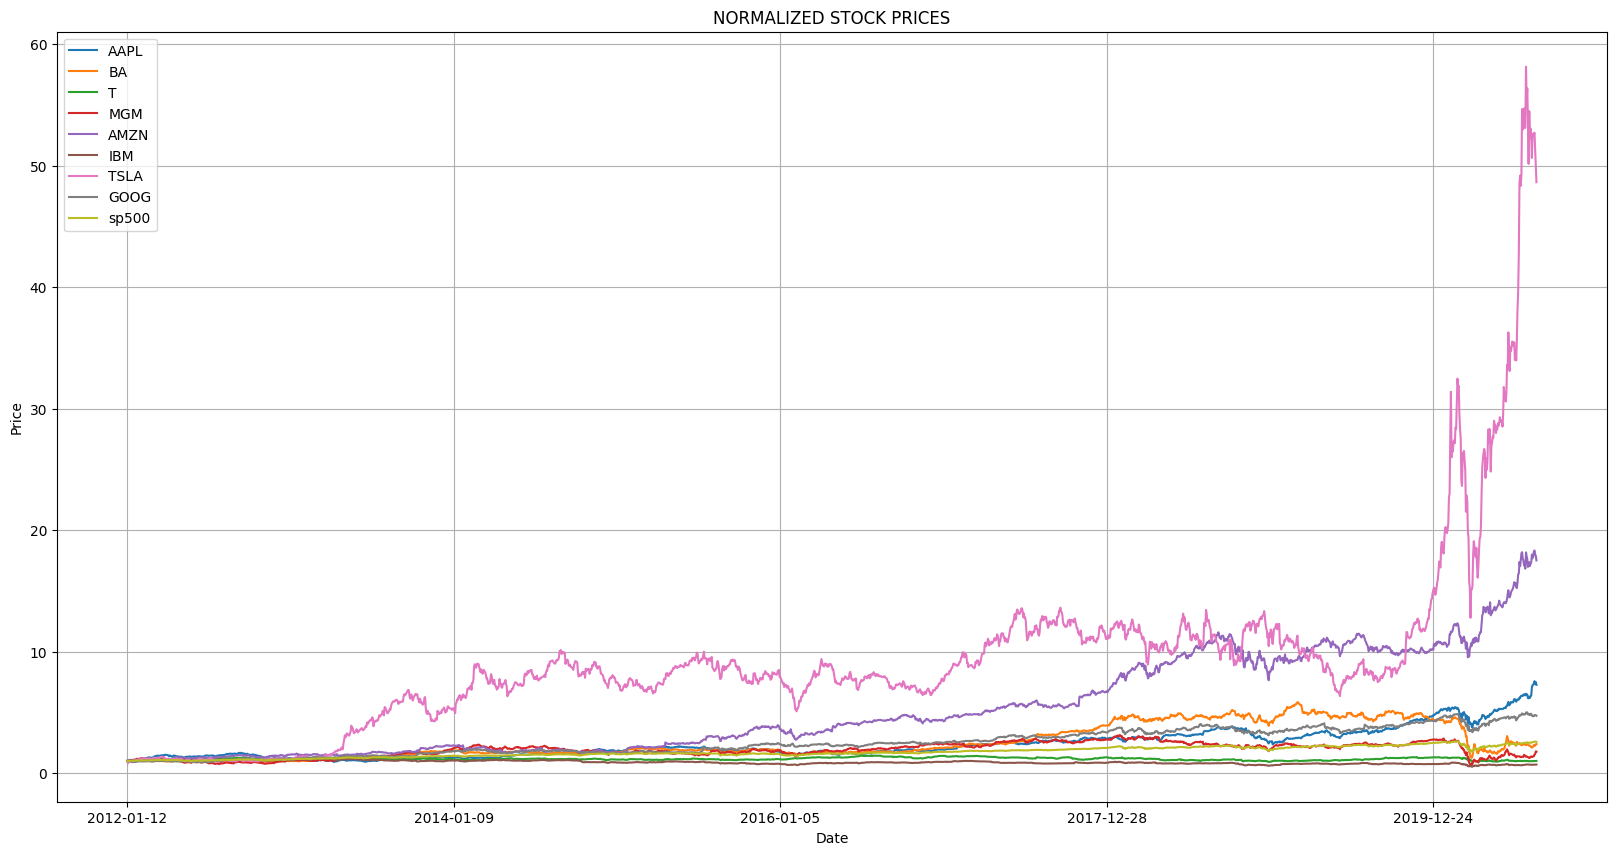

In [ ]:
show_plot(normalize(stock_df), 'NORMALIZED STOCK PRICES')

# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION

In [ ]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively.
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance.
def interactive_plot(df, title):
  fig = px.line() #This creates an empty interactibve graph sheet

  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'], y=df[i], name = i) #Now we are adding data points in the graph using add_scatter
    #name = i acts as a legend in plotly ecpress
  fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(stock_df, 'STOCK PRICES')

In [ ]:
"""Situation                                                             	Use
1. One y-column, one category column	                     px.line(df, x=..., y=..., color=...)
2. Each y-variable is a separate column	                 for col in df.columns[1:]: fig.add_scatter(...)"""

**MINI CHALLENGE #3:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [ ]:
interactive_plot(normalize(stock_df), 'STOCK PRICES')

In [ ]:
# S&P500 dropped from $3386.15 on Feb 19th, 2020 to $2237.4 by March 23rd, 2020
# Net loss = $3386.15 - $2237.4 = $1148.75 * 100 = $114875

# TASK #5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [ ]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first

sp500_return = pd.DataFrame(columns = ["Date", "Returns"])
sp500_return["Date"] = stock_df["Date"]
for i in range(len(sp500_return.index)):
  if i == 0:
    sp500_return.loc[i,"Returns"] = 0
  else:
    sp500_return.loc[i,"Returns"] = (stock_df["sp500"][i] - stock_df["sp500"][i-1])/stock_df["sp500"][i-1]
sp500_return

Date   Returns
0     2012-01-12         0
1     2012-01-13 -0.004948
2     2012-01-17  0.003553
3     2012-01-18  0.011108
4     2012-01-19  0.004939
...          ...       ...
2154  2020-08-05   0.00643
2155  2020-08-06  0.006428
2156  2020-08-07  0.000633
2157  2020-08-10  0.002742
2158  2020-08-11 -0.007969

[2159 rows x 2 columns]

**MINI CHALLENGE #4:**
- **Calculate the daily return for Amazon stock.**


In [ ]:
amazon_return = pd.DataFrame(columns = ["Date", "Returns"])
amazon_return["Date"] = stock_df["Date"]
for i in range(len(amazon_return.index)):
  if i == 0:
    amazon_return.loc[i,"Returns"] = 0
  else:
    amazon_return.loc[i,"Returns"] = (stock_df["AMZN"][i] - stock_df["AMZN"][i-1])/stock_df["AMZN"][i-1]
amazon_return

Date   Returns
0     2012-01-12         0
1     2012-01-13  0.014153
2     2012-01-17  0.018159
3     2012-01-18  0.042827
4     2012-01-19  0.026446
...          ...       ...
2154  2020-08-05  0.021091
2155  2020-08-06  0.006231
2156  2020-08-07 -0.017842
2157  2020-08-10 -0.006093
2158  2020-08-11 -0.021438

[2159 rows x 2 columns]

# TASK #6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [ ]:
# Let's define a function to calculate stocks daily returns (for all stocks)
def daily_returns(df):

  #Creating a new dataframe

    df_daily_return = pd.DataFrame(columns = df.columns)
    df_daily_return["Date"] = df["Date"]

  #Looping over columns
    for i in (df_daily_return.columns[1:]):

  #Looping over rows
      for j in range(len(df_daily_return.index)):
        if j == 0:
          df_daily_return.loc[j, i] = 0
        else:
          df_daily_return.loc[j,i] = (df.loc[j,i]- df.loc[j-1,i])/df.loc[j-1,i]
    return df_daily_return


In [ ]:
# Get the daily returns
daily_returns(stock_df)

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0     2012-01-12         0         0         0         0         0         0   
1     2012-01-13 -0.003749 -0.012051  -0.00166  0.018137  0.014153 -0.007699   
2     2012-01-17  0.011648  0.008579  0.005986 -0.008097  0.018159  0.004689   
3     2012-01-18  0.010384 -0.002392  0.002645  0.039184  0.042827  0.005944   
4     2012-01-19 -0.003169  0.006661  0.002967  0.005499  0.026446 -0.003038   
...          ...       ...       ...       ...       ...       ...       ...   
2154  2020-08-05  0.003625  0.055794 -0.005332       0.0  0.021091 -0.003099   
2155  2020-08-06  0.034889 -0.011935 -0.000335  0.104067  0.006231  0.005341   
2156  2020-08-07 -0.024495  -0.01266  0.006032  0.030878 -0.017842 -0.009198   
2157  2020-08-10  0.014535  0.055229  0.005996  0.137677 -0.006093  0.017206   
2158  2020-08-11  -0.02974  0.004013       0.0 -0.006928 -0.021438 -0.002832   

          TSLA      GOOG     sp500  
0            0         0         0  
1    -0.193274 -0.007385 -0.004948  
2     0.167179  0.005744  0.003553  
3     0.007895  0.006889  0.011108  
4    -0.001865  0.010523  0.004939  
...        ...       ...       ...  
2154 -0.001332  0.005898   0.00643  
2155  0.003071  0.017976  0.006428  
2156 -0.024752  -0.00374  0.000633  
2157 -0.023501  0.001077  0.002742  
2158 -0.031144 -0.010547 -0.007969  

[2159 rows x 10 columns]

**MINI CHALLENGE #5:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

<Axes: title={'center': 'DAILY RETURNS'}, xlabel='Date'>

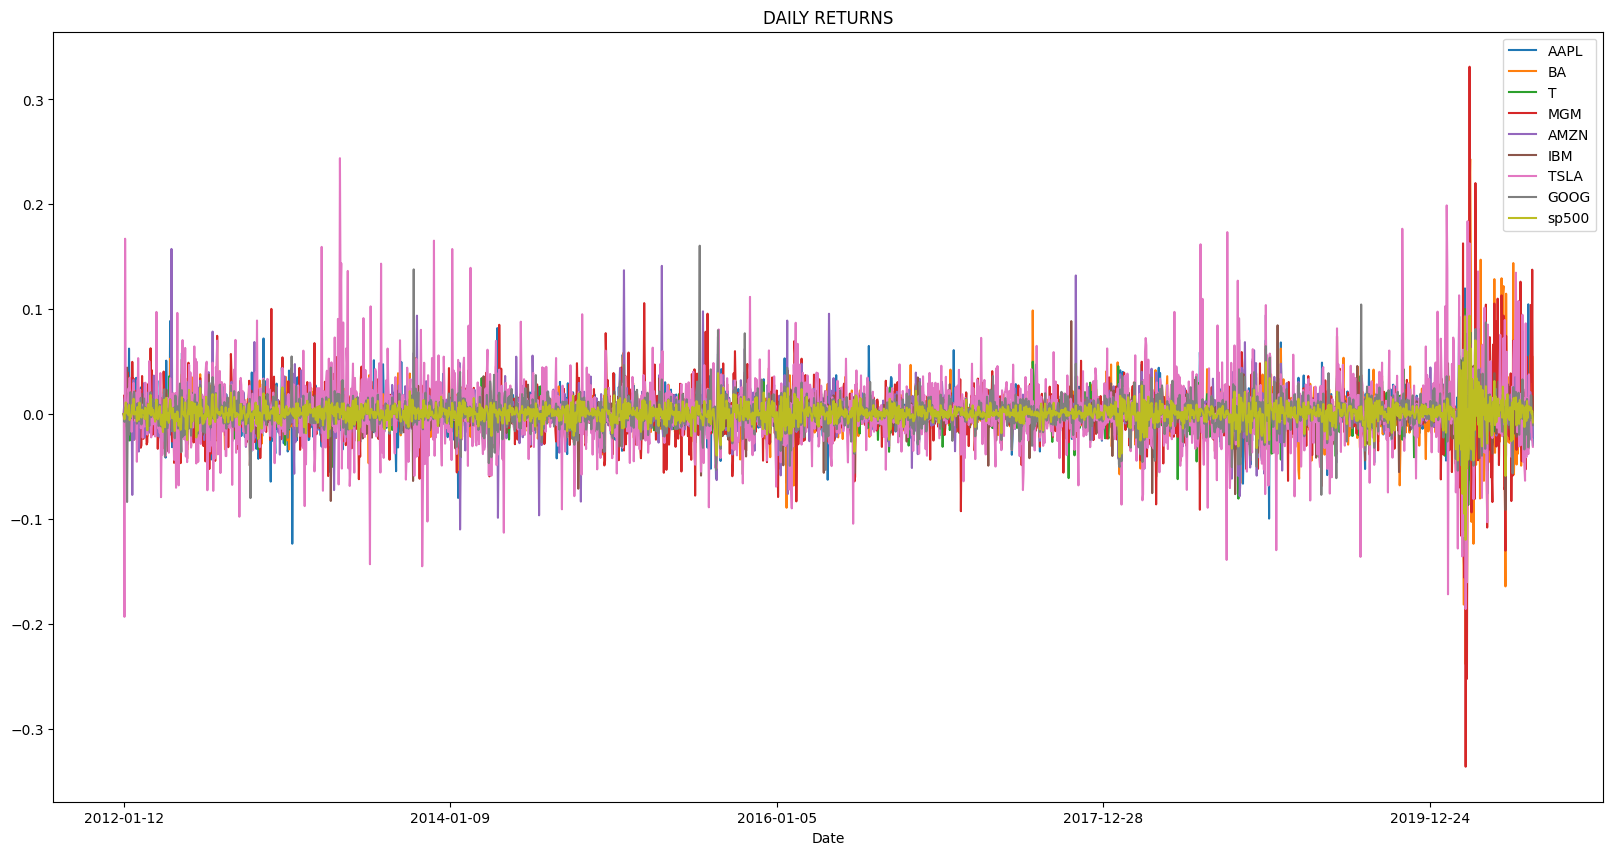

In [ ]:
daily_returns(stock_df).plot(x="Date", figsize=(20,10), title="DAILY RETURNS")
#show_plot(daily_returns(stock_df))

In [ ]:
interactive_plot(daily_returns(stock_df), "Daily Returns")

In [ ]:
daily_returns(stock_df).max()*100

Date     2020-08-112020-08-112020-08-112020-08-112020-0...
AAPL                                             11.980826
BA                                               24.318606
T                                                10.022346
MGM                                              33.114754
AMZN                                             15.745701
IBM                                              11.301051
TSLA                                             24.395054
GOOG                                             16.052431
sp500                                             9.382774
dtype: object

# TASK #7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS

In [ ]:
# Daily Return Correlation
df_daily_returns = daily_returns(stock_df)
df_daily_returns.iloc[:,1:].corr()
#Note that here .loc won't work because it expects the name of column and now its id.

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
AAPL   1.000000  0.385250  0.341373  0.384089  0.410234  0.434534  0.288535   
BA     0.385250  1.000000  0.401602  0.554229  0.267466  0.479264  0.250946   
T      0.341373  0.401602  1.000000  0.340166  0.233145  0.484219  0.152515   
MGM    0.384089  0.554229  0.340166  1.000000  0.309016  0.441631  0.311879   
AMZN   0.410234  0.267466  0.233145  0.309016  1.000000  0.339589  0.310084   
IBM    0.434534  0.479264  0.484219  0.441631  0.339589  1.000000  0.245609   
TSLA   0.288535  0.250946  0.152515  0.311879  0.310084  0.245609  1.000000   
GOOG   0.509125  0.388048  0.353695  0.439142  0.575284  0.458816  0.322805   
sp500  0.657321  0.641826  0.617463  0.631449  0.539560  0.703935  0.387921   

           GOOG     sp500  
AAPL   0.509125  0.657321  
BA     0.388048  0.641826  
T      0.353695  0.617463  
MGM    0.439142  0.631449  
AMZN   0.575284  0.539560  
IBM    0.458816  0.703935  
TSLA   0.322805  0.387921  
GOOG   1.000000  0.684572  
sp500  0.684572  1.000000

<Axes: >

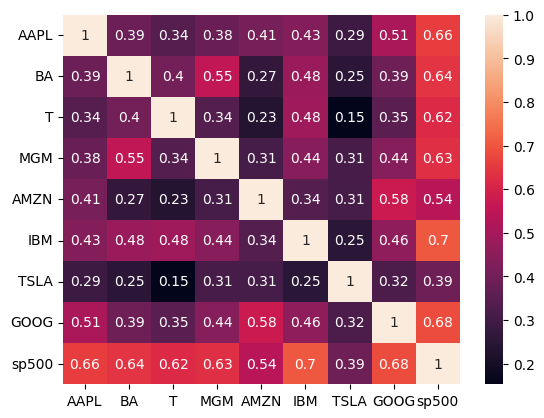

In [ ]:
sns.heatmap(df_daily_returns.iloc[:,1:].corr(), annot=True)

**MINI CHALLENGE #6:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

In [ ]:
corr_df = df_daily_returns[df_daily_returns.columns[1:]].corr()
corr_df["sp500"].sort_values(ascending=False).head(3)
#corr_df["sp500"].idxmax(2)   This won't work

sp500    1.000000
IBM      0.703935
GOOG     0.684572
Name: sp500, dtype: float64

In [ ]:
df_daily_returns["AMZN"].corr(df_daily_returns["BA"])

np.float64(0.267466138083647)

In [ ]:
df_daily_returns["MGM"].corr(df_daily_returns["BA"])

np.float64(0.5542294514206461)

# TASK #8: PLOT THE HISTOGRAM FOR DAILY RETURNS

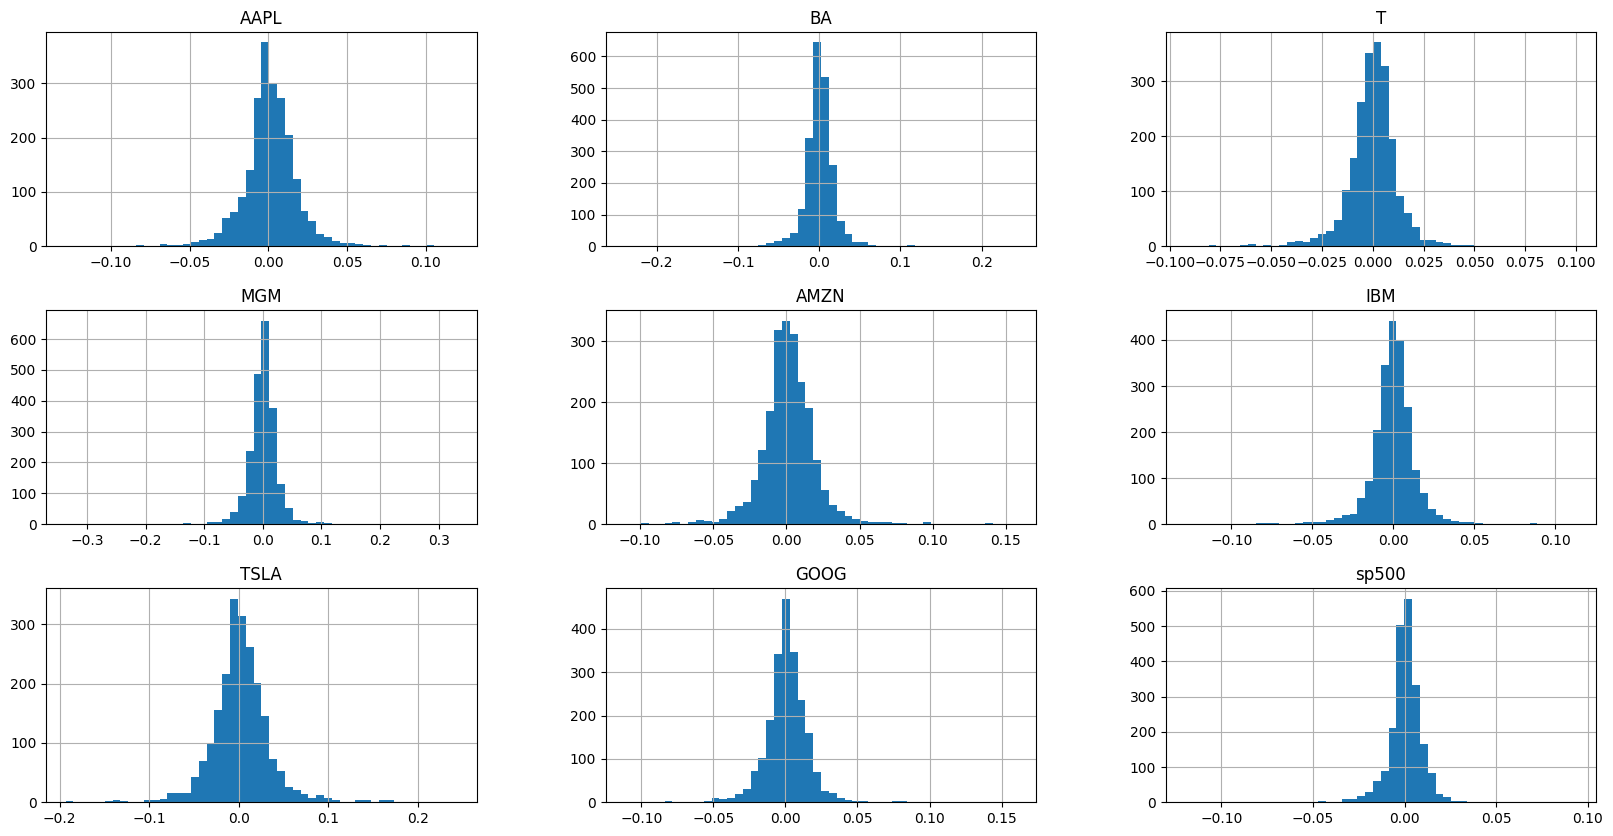

In [ ]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean
# Notice how Tesla Standard deviation is high indicating a more volatile stock
df_numeric = df_daily_returns.drop(columns=["Date"])
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
df_numeric.hist(bins=50, figsize=(20,10))
plt.show()

**MINI CHALLENGE #7:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [ ]:
#TSLA because the returns are fluctuating more in a larger range(Between -10 to 10%) than T(Between -3% to 3%)

In [ ]:
 """Use plotly.express (px) when:
You want quick and easy plots

You are working with tidy Dataframes

You're doing standard chart types, like:

px.line()

px.bar()

px.scatter()

px.histogram()

px.box(), px.violin(), etc."""

In [ ]:
"""Use plotly.figure_factory (ff) when:
You need specialty plots that px doesn’t support

You want to create multiple subplots, annotations, or complex layouts

You’re working with raw arrays or matrices, not tidy DataFrames

Some common use cases include:

ff.create_distplot() – multiple histograms with KDE

ff.create_dendrogram() – hierarchical clustering trees

ff.create_annotated_heatmap() – heatmaps with labels inside cells

ff.create_table() – HTML-style tables"""

In [ ]:
df_numeric

AAPL        BA         T       MGM      AMZN       IBM      TSLA  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    -0.003749 -0.012051 -0.001660  0.018137  0.014153 -0.007699 -0.193274   
2     0.011648  0.008579  0.005986 -0.008097  0.018159  0.004689  0.167179   
3     0.010384 -0.002392  0.002645  0.039184  0.042827  0.005944  0.007895   
4    -0.003169  0.006661  0.002967  0.005499  0.026446 -0.003038 -0.001865   
...        ...       ...       ...       ...       ...       ...       ...   
2154  0.003625  0.055794 -0.005332  0.000000  0.021091 -0.003099 -0.001332   
2155  0.034889 -0.011935 -0.000335  0.104067  0.006231  0.005341  0.003071   
2156 -0.024495 -0.012660  0.006032  0.030878 -0.017842 -0.009198 -0.024752   
2157  0.014535  0.055229  0.005996  0.137677 -0.006093  0.017206 -0.023501   
2158 -0.029740  0.004013  0.000000 -0.006928 -0.021438 -0.002832 -0.031144   

          GOOG     sp500  
0     0.000000  0.000000  
1    -0.007385 -0.004948  
2     0.005744  0.003553  
3     0.006889  0.011108  
4     0.010523  0.004939  
...        ...       ...  
2154  0.005898  0.006430  
2155  0.017976  0.006428  
2156 -0.003740  0.000633  
2157  0.001077  0.002742  
2158 -0.010547 -0.007969  

[2159 rows x 9 columns]

In [ ]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
data = []

for i in df_numeric.columns:
  data.append(df_numeric[i].values) #Just writing df_numeric[i] will give a list of series and not list of arrays of values.

data

[array([ 0.        , -0.00374946,  0.01164812, ..., -0.02449458,
         0.0145348 , -0.02973987]),
 array([ 0.        , -0.01205144,  0.00857909, ..., -0.01265966,
         0.0552288 ,  0.00401316]),
 array([ 0.        , -0.00166006,  0.00598603, ...,  0.00603217,
         0.00599604,  0.        ]),
 array([ 0.        ,  0.01813685, -0.00809717, ...,  0.03087768,
         0.13767729, -0.00692841]),
 array([ 0.        ,  0.01415339,  0.01815943, ..., -0.01784187,
        -0.00609323, -0.02143792]),
 array([ 0.        , -0.00769869,  0.00468852, ..., -0.00919762,
         0.01720552, -0.0028322 ]),
 array([ 0.        , -0.1932743 ,  0.16717854, ..., -0.02475194,
        -0.02350092, -0.03114399]),
 array([ 0.        , -0.00738516,  0.0057441 , ..., -0.00373974,
         0.00107728, -0.01054744]),
 array([ 0.        , -0.00494792,  0.00355295, ...,  0.00063303,
         0.00274222, -0.00796913])]

In [ ]:
# Plotly's Python API contains a super pwerful module known as figure factory module
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio
fig = ff.create_distplot(data, df_numeric.columns, show_hist=True)
fig.show()